In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv('airline-passenger-traffic.csv')
data.columns = ['Month','Passengers']

In [90]:
data.head()

,Month,Passengers
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       143 non-null    object 
 1   Passengers  139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [92]:
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data = data.set_index('Month')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 1949-02-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  139 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [94]:
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


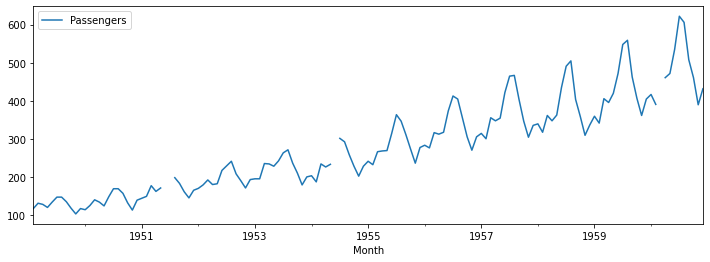

In [95]:
data.plot(figsize=[12,4])
plt.legend(loc='best')
plt.show()

In [9]:
data_1 = pd.read_csv('Metrail+dataset.csv')

In [10]:
data_1.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [11]:
data_12 = data_1.ffill(axis=0)

In [12]:
data_12['Travellers(\'000)'].mean()

1838.685534591195

In [13]:
data_13 = data_1.bfill(axis=0)

In [14]:
data_13['Travellers(\'000)'].mean()

1834.446540880503

In [15]:
data_13['Travellers'] = data_1['Travellers(\'000)'].interpolate(method='linear')

In [16]:
data_13.head(6)

,Month,Travellers('000),Travellers
0,Jan-91,1724.0,1724.0
1,Feb-91,1638.0,1638.0
2,Mar-91,1987.0,1987.0
3,Apr-91,1825.0,1825.0
4,May-91,1879.0,1852.0
5,Jun-91,1879.0,1879.0


In [17]:
data_13['Travellers'].mean()

1836.566037735849

In [18]:
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [96]:
import seaborn as sns

<AxesSubplot:xlabel='Passengers'>

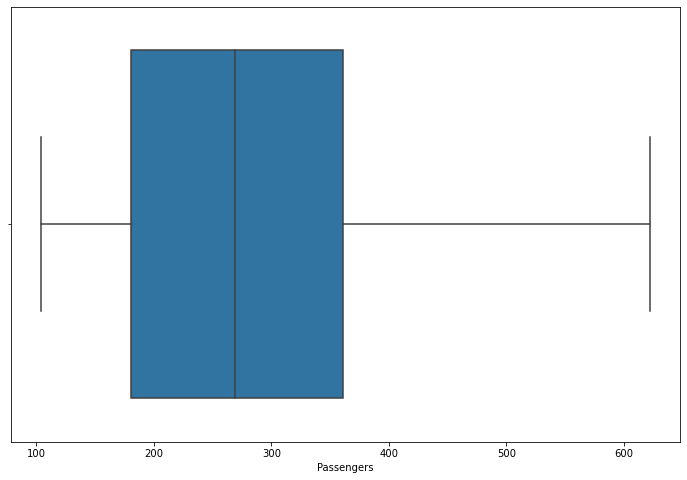

In [97]:
sns.boxplot(data.Passengers)

In [98]:
data['Passengers'] = data.Passengers.interpolate(method='linear')

In [99]:
data.isnull().sum()

Passengers    0
dtype: int64

In [100]:
from pylab import rcParams
import statsmodels.api as sm 
rcParams['figure.figsize'] = 12,8

In [101]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')

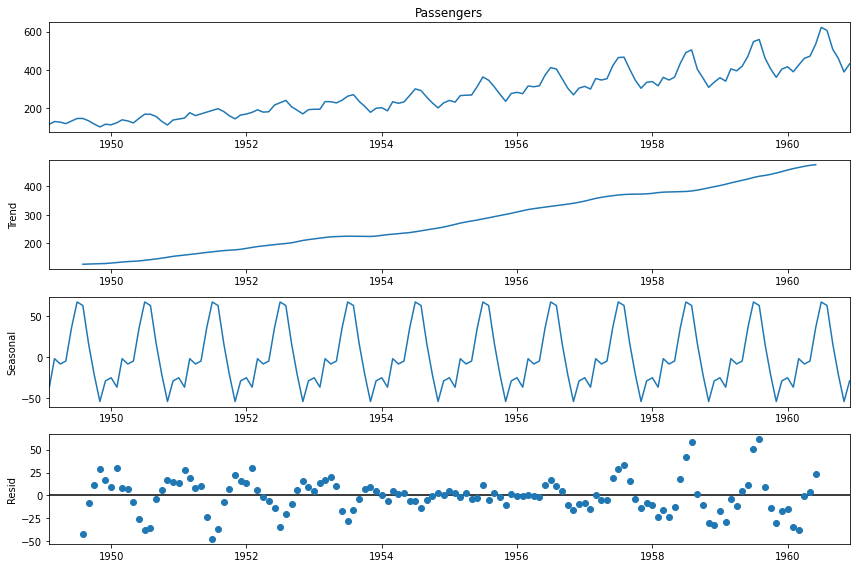

In [102]:
fig = decomposition.plot()

In [103]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')

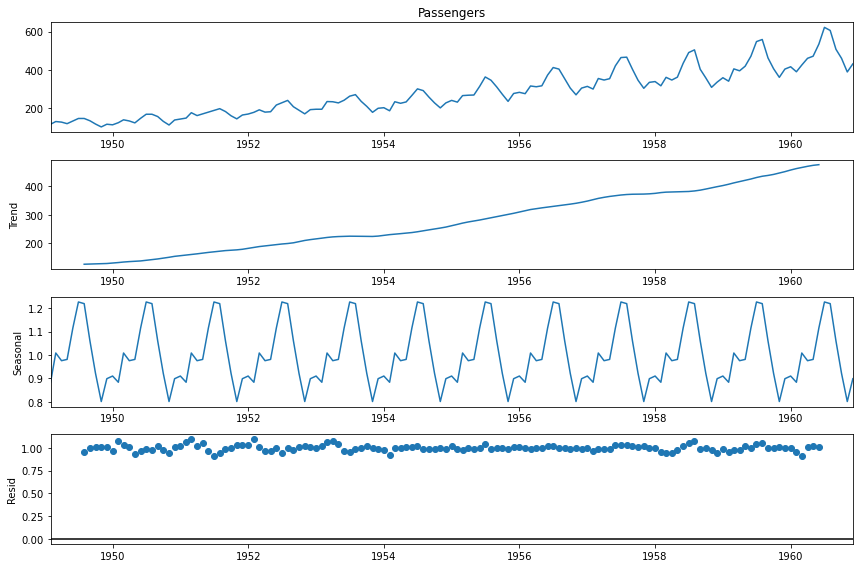

In [104]:
fig = decomposition.plot()

## Build and evaluate time series forecast

In [105]:
train_len=120
train = data[:train_len]
test = data[train_len:]

In [106]:
train.shape

(120, 1)

In [107]:
test.shape

(23, 1)

In [31]:
## Naive method

y_hat_naive = test.copy()

In [32]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [33]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-02-01,342.0,360.0
1959-03-01,406.0,360.0
1959-04-01,396.0,360.0
1959-05-01,420.0,360.0
1959-06-01,472.0,360.0


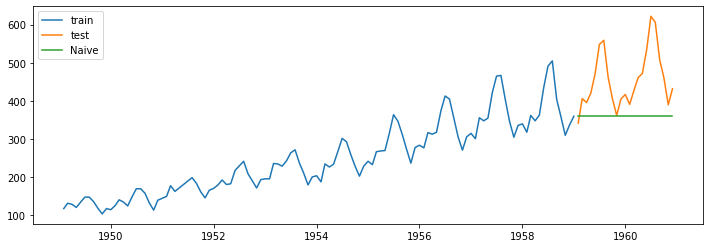

In [34]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'train')
plt.plot(test['Passengers'], label = 'test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive')
plt.legend(loc='best')
plt.show()

## Simple average Method

In [35]:
y_hat_avg = test.copy()
y_hat_avg['Avg_forecast'] = train['Passengers'].mean()

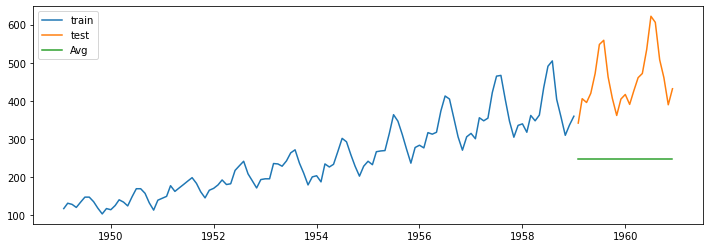

In [36]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'train')
plt.plot(test['Passengers'], label = 'test')
plt.plot(y_hat_avg['Avg_forecast'], label='Avg')
plt.legend(loc='best')
plt.show()

In [37]:
## calculate RSME and MAPE 

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [39]:
rsme = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)

In [40]:
rsme

121.4

In [41]:
mape = mean_absolute_percentage_error(test['Passengers'], y_hat_naive['naive_forecast']).round(2)

In [42]:
mape

0.2

In [43]:
rsme_avg = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['Avg_forecast'])).round(2)
mape_avg = mean_absolute_percentage_error(test['Passengers'], y_hat_avg['Avg_forecast']).round(2)

In [44]:
rsme_avg, mape_avg

(221.2, 0.44)

In [45]:
##Sample 

In [46]:
data_new = pd.read_csv('exchange-rate-twi (2).csv')

In [47]:
data_new.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


<AxesSubplot:xlabel='Month'>

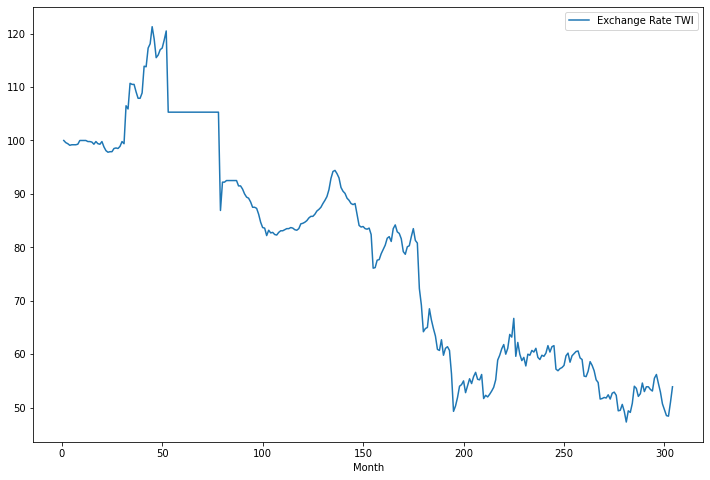

In [48]:
data_new.set_index('Month',inplace=True)
data_new.plot()

In [49]:
train = data_new[:212]
test = data_new[212:]

In [50]:
train.shape, test.shape

((212, 1), (92, 1))

In [51]:
train.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [52]:
train['Exchange Rate TWI'].mean()

88.32547169811328

In [53]:
train['Exchange Rate TWI'][212-1]

52.3

In [54]:
test['Avg'] = train['Exchange Rate TWI'].mean()
test['naive'] = train['Exchange Rate TWI'][212-1]
test['sma'] = train['Exchange Rate TWI'].rolling(window=12).mean()

In [55]:
rsme_avg = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], test['Avg'] )).round(2)
mape_avg = mean_absolute_percentage_error(test['Exchange Rate TWI'], test['Avg'] ).round(2)

In [56]:
rsme_avg, mape_avg

(32.42, 0.58)

In [57]:
rsme_n = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], test['Avg'] )).round(2)
mape_n = mean_absolute_percentage_error(test['Exchange Rate TWI'], test['Avg'] ).round(2)

In [58]:
rsme_n, mape_n

(32.42, 0.58)

In [59]:
data_new['sma'] = data_new.rolling(12).mean()

In [60]:
data_new.head(15)

,Exchange Rate TWI,sma
Month,,
1,100.0,NaN
2,99.6,NaN
3,99.4,NaN
4,99.1,NaN
5,99.2,NaN
6,99.2,NaN
7,99.2,NaN
8,99.3,NaN
9,100.0,NaN


In [61]:
test = data_new[212:]
train =  data_new[:212]

In [62]:
test.head()

,Exchange Rate TWI,sma
Month,,
213,52.5,54.300000
214,53.1,54.216667
215,53.8,54.083333
216,55.2,54.141667
217,58.9,54.400000


In [63]:
rsme_sma = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], test['sma'] )).round(2)
mape_sma = mean_absolute_percentage_error(test['Exchange Rate TWI'], test['sma'] ).round(2)

In [64]:
rsme_sma,mape_sma

(2.61, 0.04)

In [65]:
y_hat_sma = test.copy()
y_hat_sma['Moving'] = train['Exchange Rate TWI'].rolling(12).mean()

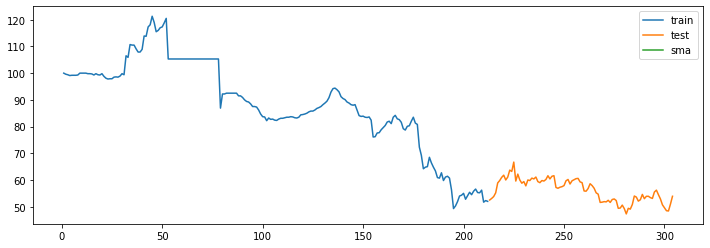

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = 'train')
plt.plot(test['Exchange Rate TWI'], label = 'test')
plt.plot(y_hat_sma['Moving'], label='sma')
plt.legend(loc='best')
plt.show()

In [67]:
train_len

120

In [68]:
def plot_rolling(window=12):
    y_hat_sma = data.copy()
    y_hat_sma['sma_forecast'] = data['Passengers'].rolling(window=window).mean()
    y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
    plt.figure(figsize=(12,4))
    plt.plot(data[:train_len], label='Train')
    plt.plot(data[train_len:], label = 'Test')
    plt.plot(y_hat_sma['sma_forecast'], label = 'SMA')
    plt.legend(loc='best')
    plt.show()

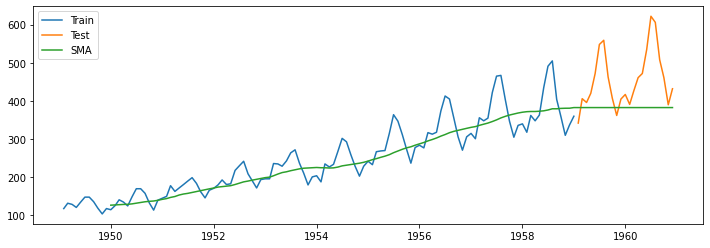

In [69]:
plot_rolling()

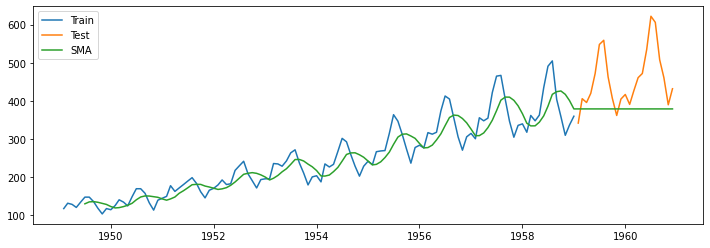

In [70]:
plot_rolling(6)

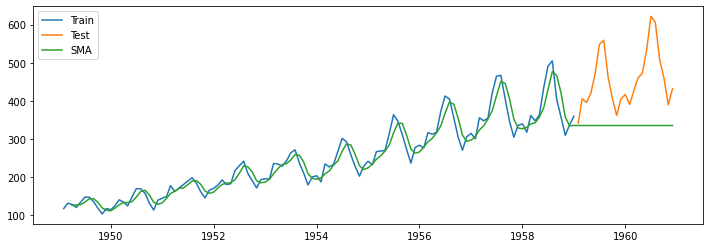

In [71]:
plot_rolling(3)

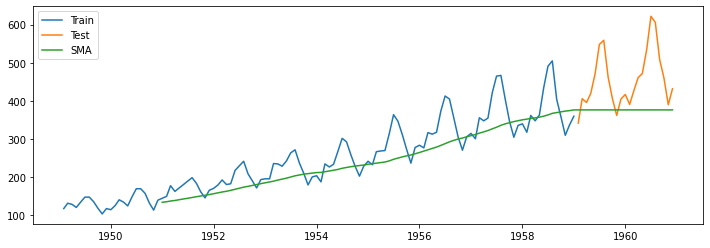

In [72]:
plot_rolling(24)

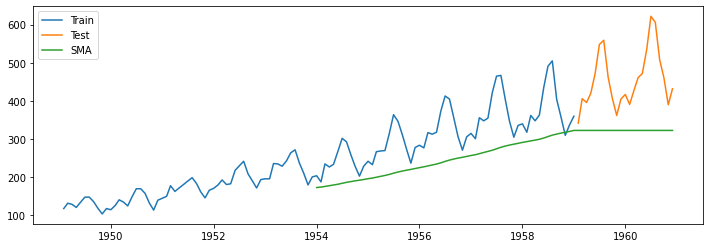

In [73]:
plot_rolling(60)

In [74]:
## Analysis for questions

In [75]:
data_new.shape

(304, 2)

In [76]:
data_new.head()

,Exchange Rate TWI,sma
Month,,
1,100.0,NaN
2,99.6,NaN
3,99.4,NaN
4,99.1,NaN
5,99.2,NaN


In [77]:
y_hat_sma = data_new.copy()
y_hat_sma['sma_forecast'] = data_new['Exchange Rate TWI'].rolling(window=12).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [78]:
y_hat_sma.head(15)

,Exchange Rate TWI,sma,sma_forecast
Month,,,
1,100.0,NaN,NaN
2,99.6,NaN,NaN
3,99.4,NaN,NaN
4,99.1,NaN,NaN
5,99.2,NaN,NaN
6,99.2,NaN,NaN
7,99.2,NaN,NaN
8,99.3,NaN,NaN
9,100.0,NaN,NaN


In [79]:
rsme_sma = np.sqrt(mean_squared_error(y_hat_sma['Exchange Rate TWI'][212:], y_hat_sma['sma_forecast'][212:])).round(2)
mape_sma = mean_absolute_percentage_error(y_hat_sma['Exchange Rate TWI'][212:], y_hat_sma['sma_forecast'][212:]).round(2)

In [80]:
rsme_sma, mape_sma

(27.56, 0.49)

In [82]:
#test_new['sma_forecast'] = data_new['Exchange Rate TWI'].rolling(window=12).mean()
#test_new['sma_forecast'][212:] = test_new['sma_forecast'][211]

In [83]:
#data_new.set_index('Month', inplace=True)

KeyError: "None of ['Month'] are in the columns"

In [ ]:
train_new = data_new[:212]
test_new = data_new[212:]

In [ ]:
y_hat_sma = test_new.copy()
y_hat_sma['moving_avg'] = train_new['Exchange Rate TWI'].rolling(window=12).mean()

In [ ]:
y_hat_sma.head(100)

In [ ]:
data = pd.read_csv('exchange-rate-twi.csv')

In [ ]:
train_len=212

In [84]:
def plot_rolling(window=12):
    y_hat_sma = data.copy()
    y_hat_sma['sma_forecast'] = data['Exchange Rate TWI'].rolling(window=window).mean()
    y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
    plt.figure(figsize=(12,4))
    plt.plot(data[:train_len], label='Train')
    plt.plot(data[train_len:], label = 'Test')
    #plt.plot(y_hat_sma['sma_forecast'], label = 'SMA')
    plt.legend(loc='best')
    plt.show()

In [85]:
plot_rolling()

KeyError: 'Exchange Rate TWI'

In [ ]:
#data.set_index('Month',inplace=True)
y_hat_sma = data.copy()
y_hat_sma['sma_forecast'] = data['Exchange Rate TWI'].rolling(window=12).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(data[:train_len], label='Train')
plt.plot(data[train_len:], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'SMA')
plt.legend(loc='best')
plt.show()

In [ ]:
train = data[:212]
test = data[212:]

In [ ]:
data = pd.read_csv('exchange-rate-twi.csv')
data.set_index('Month',inplace=True)

In [ ]:
train_len=212
train = data[:train_len]
test = data[train_len:]

In [ ]:
y_hat_avg = data.copy()
y_hat_avg['Avg_forecast'] = train['Exchange Rate TWI'].rolling(12).mean()
y_hat_avg['Avg_forecast'][train_len:] = y_hat_avg['Avg_forecast'][train_len-1]

#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = 'train')
plt.plot(test['Exchange Rate TWI'], label = 'test')
plt.plot(y_hat_avg['Avg_forecast'], label='Avg')
plt.legend(loc='best')
plt.show()

In [ ]:
rsme = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['Avg_forecast'][212:])).round(2)
mape = mean_absolute_percentage_error(test['Exchange Rate TWI'], y_hat_avg['Avg_forecast'][212:])*100

In [ ]:
rsme, mape

In [ ]:
# 12 -> (4.57, 6.890608711900493)
# 6 -> (4.58, 6.896414762601088)
# 3 -> (5.1, 7.316297873991047)

In [ ]:
rsme_avg = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['Avg_forecast'])).round(2)
mape_avg = mean_absolute_percentage_error(test['Passengers'], y_hat_avg['Avg_forecast']).round(2)

## Simple Exponential Smoothing 

In [87]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [109]:
model = SimpleExpSmoothing(train['Passengers'])

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [110]:
model_fit=model.fit(smoothing_level=0.2, optimized=False)

In [111]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [112]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

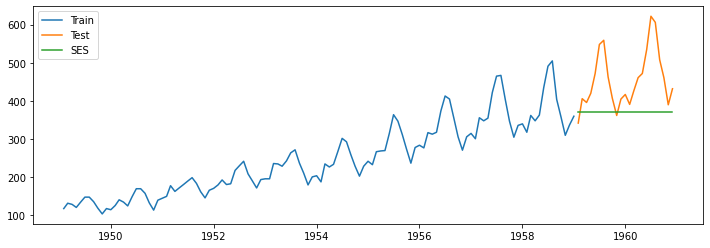

In [114]:
### Plot train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label = 'SES')
plt.legend(loc='best')
plt.show()

In [115]:
rsme_ses = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape_ses = mean_absolute_percentage_error(test['Passengers'], y_hat_ses['ses_forecast']).round(2)

In [116]:
rsme_ses, mape_ses

(112.15, 0.18)

In [182]:
al, rs, ma= [],[],[]

In [183]:
def sme(alpha=0.2):
    model = SimpleExpSmoothing(train['Passengers'])
    model_fit=model.fit(smoothing_level=alpha, optimized=False)
    y_hat_ses = test.copy()
    y_hat_ses['ses_forecast'] = model_fit.forecast(24)
    plt.figure(figsize=(12,4))
    plt.plot(train['Passengers'], label='Train')
    plt.plot(test['Passengers'], label = 'Test')
    plt.plot(y_hat_ses['ses_forecast'], label = 'SES')
    plt.legend(loc='best')
    plt.show()
    rsme_ses = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
    mape_ses = mean_absolute_percentage_error(test['Passengers'], y_hat_ses['ses_forecast']).round(2)
    print(rsme_ses, mape_ses)
    al.append(alpha)
    rs.append(rsme_ses)
    ma.append(mape_ses)

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


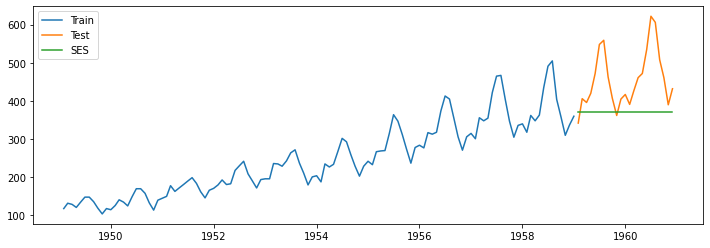

112.07 0.18


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


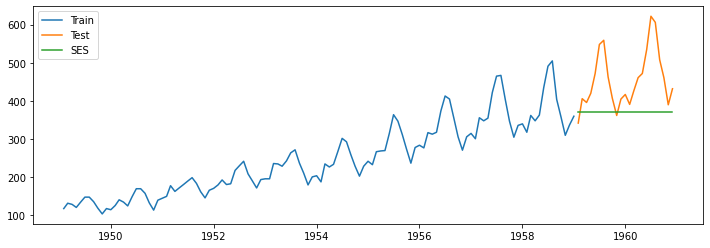

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


112.15 0.18


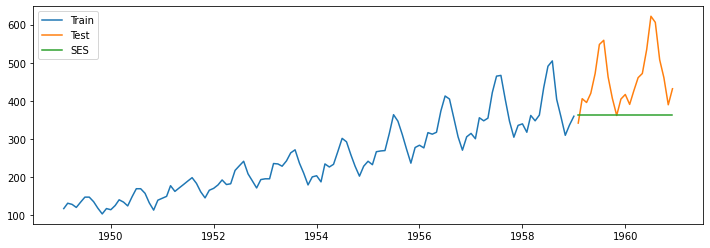

118.05 0.19


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


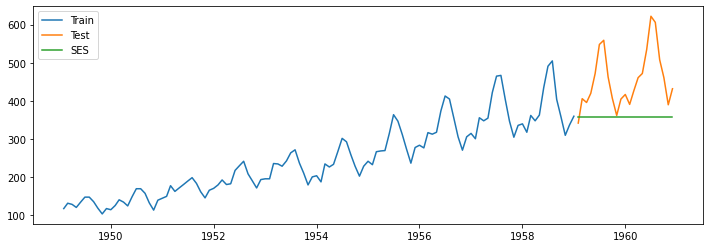

123.67 0.2


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


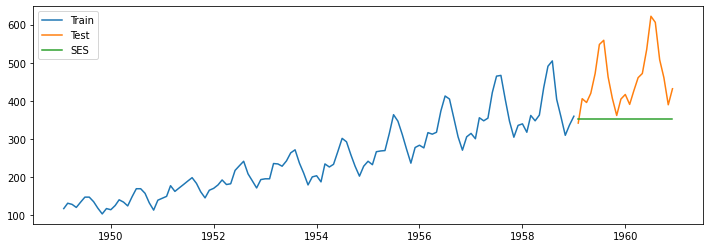

127.14 0.21


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


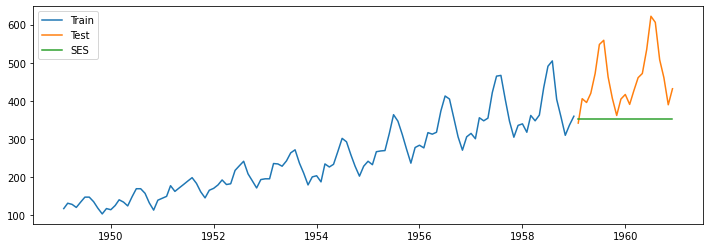

128.18 0.21


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


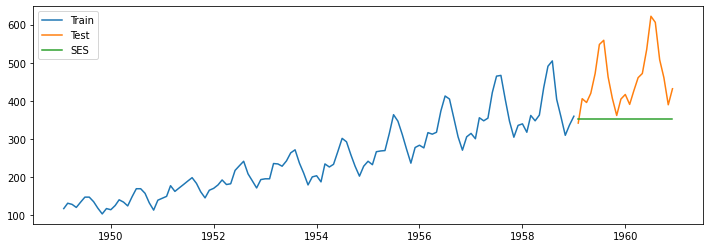

127.38 0.21


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


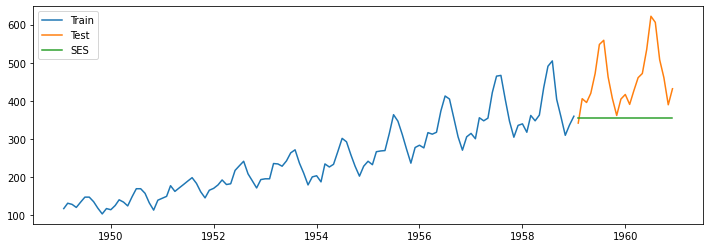

125.56 0.21


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


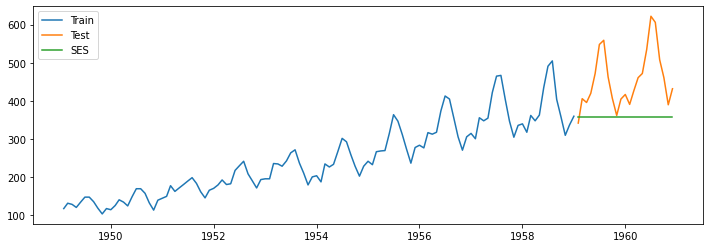

123.41 0.2


In [186]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    sme(i)

In [187]:
dic = {'alpha' : al, 'rsme':rs, 'mape': ma}

In [188]:
df = pd.DataFrame(dic)

In [190]:
df.head(10)

,alpha,rsme,mape
0,0.1,112.07,0.18
1,0.2,112.15,0.18
2,0.3,118.05,0.19
3,0.4,123.67,0.20
4,0.5,127.14,0.21
5,0.6,128.18,0.21
6,0.7,127.38,0.21
7,0.8,125.56,0.21
8,0.9,123.41,0.20


In [191]:
df.set_index('alpha', inplace=True)

In [192]:
df.head(10)

,rsme,mape
alpha,,
0.1,112.07,0.18
0.2,112.15,0.18
0.3,118.05,0.19
0.4,123.67,0.20
0.5,127.14,0.21
0.6,128.18,0.21
0.7,127.38,0.21
0.8,125.56,0.21
0.9,123.41,0.20


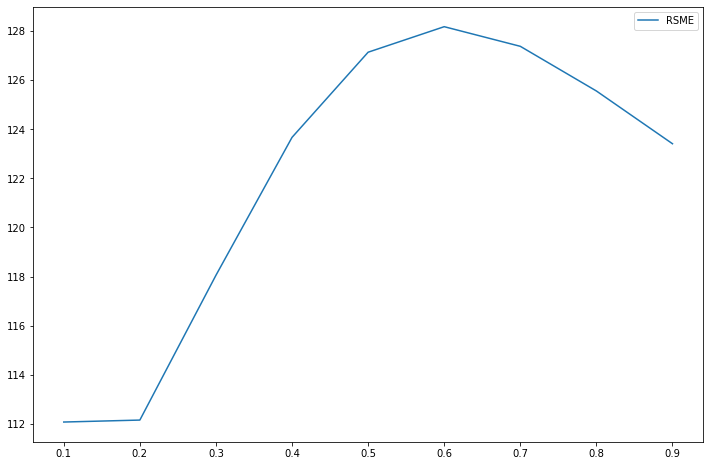

In [196]:
plt.plot(df['rsme'], label='RSME')
#plt.plot(df['mape']*100, label='MAPE')
plt.legend(loc='best')
plt.show()

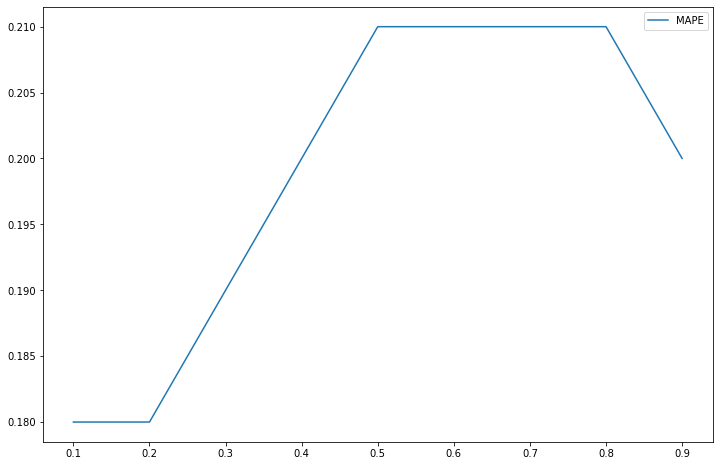

In [197]:
#plt.plot(df['rsme'], label='RSME')
plt.plot(df['mape'], label='MAPE')
plt.legend(loc='best')
plt.show()

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


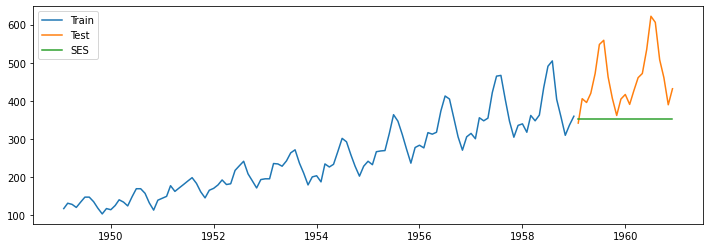

128.18 0.21


In [198]:
sme(0.6)

In [199]:
tempra = pd.read_csv('Daily+temperature+data.csv')

In [200]:
tempra.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


In [201]:
tempra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              730 non-null    object 
 1   Temperature(Min)  730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [228]:
def myDateConv(tt):
    sep = tt[2]
    if sep == '-':
        return pd.to_datetime(tt, format='%d-%m-%Y').strftime("%Y-%m-%d")
    else:
        return pd.to_datetime(tt, format='%m/%d/%Y').strftime("%Y-%m-%d")

In [229]:
tempra = pd.read_csv('Daily+temperature+data.csv', converters={'Date': myDateConv})

In [230]:
tempra.head()

,Date,Temperature(Min)
0,2017-01-01,14.3
1,2017-02-01,17.4
2,2017-03-01,18.5
3,2017-04-01,16.8
4,2017-05-01,11.5


In [231]:
tempra.set_index('Date', inplace=True)

In [232]:
tempra.head(30)

,Temperature(Min)
Date,
2017-01-01,14.3
2017-02-01,17.4
2017-03-01,18.5
2017-04-01,16.8
2017-05-01,11.5
2017-06-01,9.5
2017-07-01,12.2
2017-08-01,15.7
2017-09-01,16.3


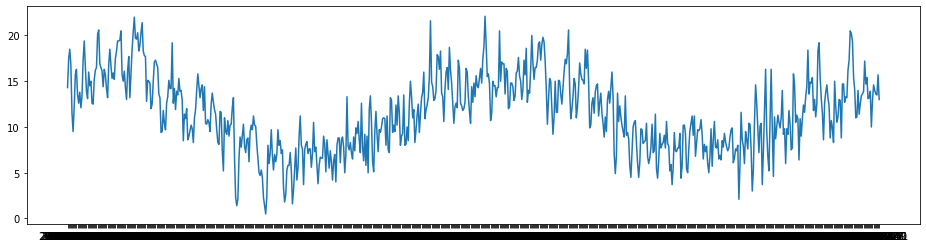

In [242]:
plt.figure(figsize=(16,4))
plt.plot(tempra['Temperature(Min)'])

In [243]:
train = tempra[:511]
test = tempra[511:]

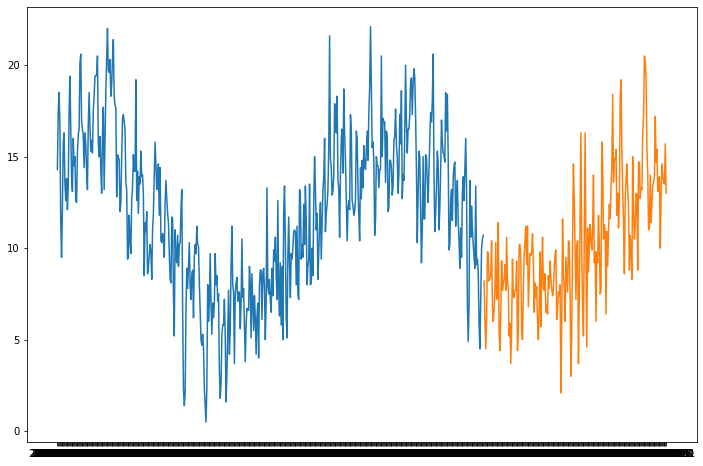

In [244]:
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.show()

In [254]:
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit=model.fit(smoothing_level=0.2, optimized=False)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


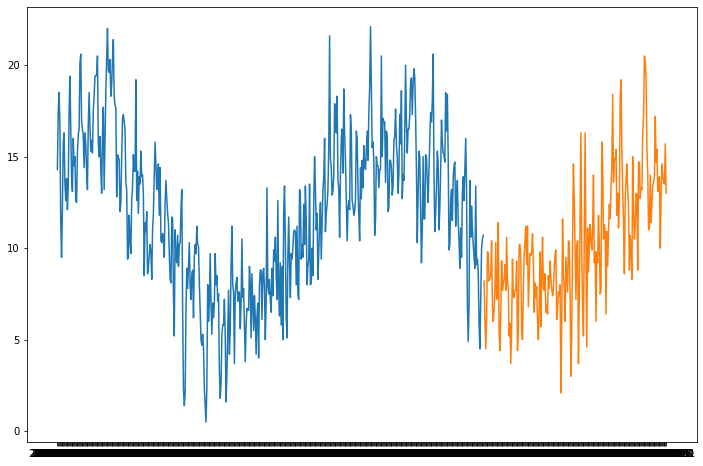

In [255]:
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='SES')
plt.show()

In [253]:
y_hat_ses.head()

,Temperature(Min),ses_forecast
Date,,
2018-05-27,8.2,NaN
2018-05-28,6.1,NaN
2018-05-29,4.5,NaN
2018-05-30,6.1,NaN
2018-05-31,9.8,NaN


In [249]:
rsme_ses = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_ses['ses_forecast'])).round(2)
mape_ses = mean_absolute_percentage_error(test['Temperature(Min)'], y_hat_ses['ses_forecast']).round(2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').